In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [2]:
# import cleaned path
clean_df_path = 'clean.csv'

# pandas read csv
clean_df = pd.read_csv(clean_df_path)

# preview
clean_df.head(1)

,race_date,race_city,race_no,race_type,race_sex_group,race_age_group,race_race_group,race_length,race_track_type,race_track_condition,...,horse_owner,horse_trainer,horse_race_degree,horse_win_value,horse_psf_rate,horse_psf_rank,Horse_starting_box_no,horse_margin,horse_late_start,horse_rate
0,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,NİMET ARİF KURTEL,TAMER TURAN,1.31.26,1.5,49,1,1,9 Lengths,NaN,42


In [3]:
# 1. The winning rate horse_sex  (f/ m)? undefine? 
female_horse = clean_df[clean_df['horse_sex'] == 'f']

female_horse_position_df = female_horse.groupby('result')['result'].count()
# female_horse_position_df

In [4]:
male_horse = clean_df[clean_df['horse_sex'] == 'm']

male_horse_position_df = male_horse.groupby('result')['result'].count()
# male_horse_position_df

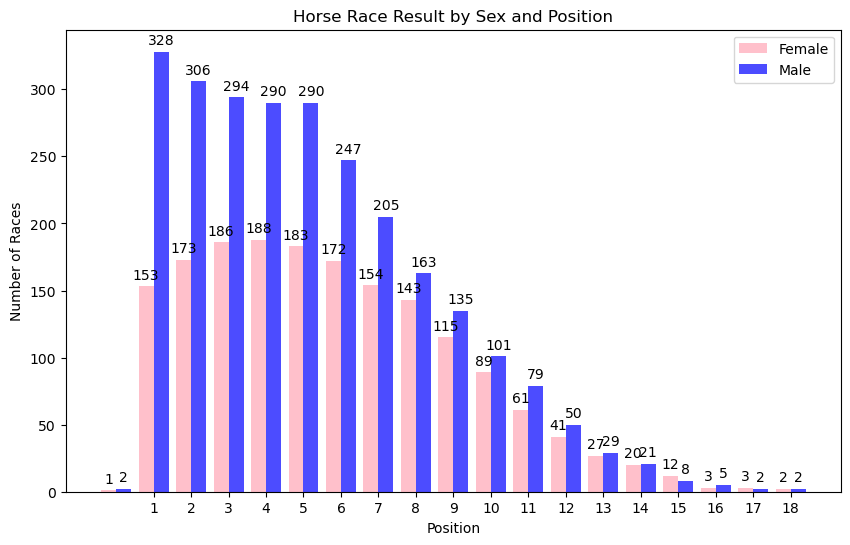

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width
bar_width = 0.4

# Plotting female horse positions
female_bars = ax.bar(female_horse_position_df.index - bar_width/2, female_horse_position_df.values, 
       color='pink', width=bar_width, label='Female')

# Plotting male horse positions
male_bars = ax.bar(male_horse_position_df.index + bar_width/2, male_horse_position_df.values, 
       color='blue', width=bar_width, label='Male', alpha=0.7)

# Function to add data labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add data labels for female bars
add_labels(female_bars)

# Add data labels for male bars
add_labels(male_bars)

# Adding labels and title
ax.set_xlabel('Position')
ax.set_ylabel('Number of Races')
ax.set_title('Horse Race Result by Sex and Position')
ax.legend()

# Set x-axis ticks to show only integers from 1 to 18
plt.xticks(range(1, 19))

# Show plot
plt.show()


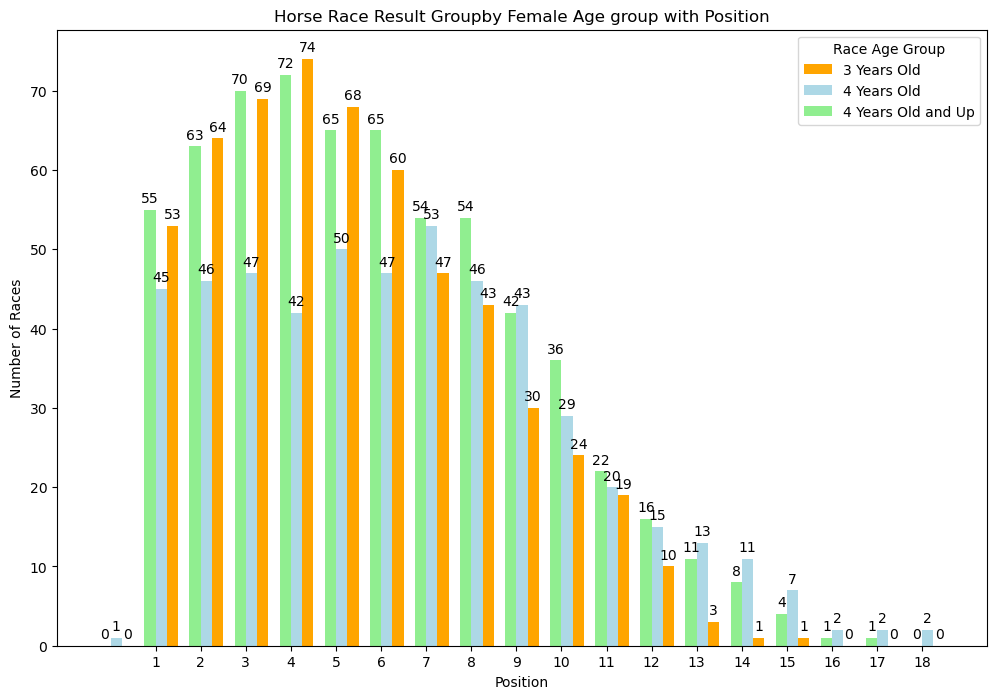

In [14]:
# Group by race_age_group and position, then count the number of races
female_horses_by_age_and_position = female_horse.groupby(['race_age_group', 'result']).size().unstack(fill_value=0)

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 8))

# Bar width
bar_width = 0.25

# Define colors for different age groups
colors = ['orange', 'lightblue', 'lightgreen']

# Plotting female horse positions by race_age_group
for i, age_group in enumerate(female_horses_by_age_and_position.index):
    bars = ax.bar(female_horses_by_age_and_position.columns.astype(int) - bar_width * (i - 1.5),
                  female_horses_by_age_and_position.loc[age_group].values,
                  color=colors[i % len(colors)], width=bar_width, label=age_group)
    
    # Add data values on each bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Adding labels and title
ax.set_xlabel('Position')
ax.set_ylabel('Number of Races')
ax.set_title('Horse Race Result Groupby Female Age group with Position')
ax.legend(title='Race Age Group')

# Set x-axis ticks to show only integers from 1 to 18
plt.xticks(range(1, 19))

# Show plot
plt.show()


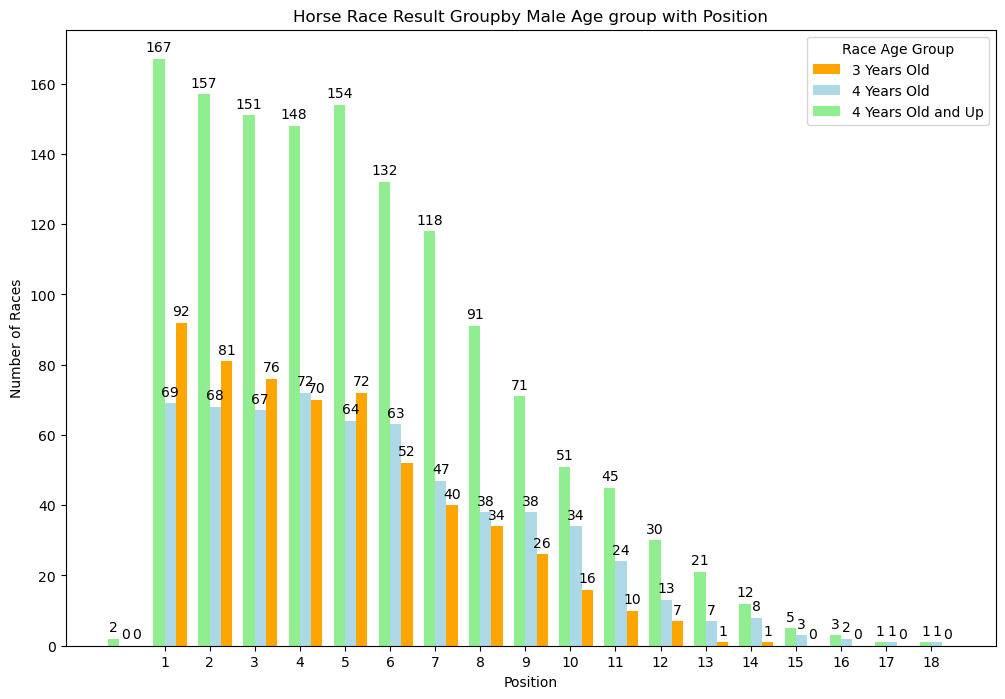

In [7]:
# Group by race_age_group and position, then count the number of races
male_horses_by_age_and_position = male_horse.groupby(['race_age_group', 'result']).size().unstack(fill_value=0)

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 8))

# Bar width
bar_width = 0.25

# Define colors for different age groups
colors = ['orange', 'lightblue', 'lightgreen']


# Plotting male horse positions by race_age_group
for i, age_group in enumerate(male_horses_by_age_and_position.index):
    bars = ax.bar(male_horses_by_age_and_position.columns.astype(int) - bar_width * (i - 1.5),
                  male_horses_by_age_and_position.loc[age_group].values,
                  color=colors[i % len(colors)], width=bar_width, label=age_group)
    
    # Add data values on each bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Adding labels and title
ax.set_xlabel('Position')
ax.set_ylabel('Number of Races')
ax.set_title('Horse Race Result Groupby Male Age group with Position')
ax.legend(title='Race Age Group')

# Set x-axis ticks to show only integers from 1 to 18
plt.xticks(range(1, 19))

# Show plot
plt.show()

In [8]:
#checking
female_age_group = female_horse.groupby(['race_age_group'])['result'].count()
male_age_group = male_horse.groupby(['race_age_group'])['result'].count()
male_age_group
female_age_group

race_age_group
3 Years Old           566
4 Years Old           521
4 Years Old and Up    639
Name: result, dtype: int64

In [9]:
# 2. How does the win value vary with race length?

In [10]:
# 4. Name of the Horse ranking based on the horse age group?

In [11]:
# 5. Who are the top 10 horse trainers by the number of wins?